In [1]:
print("test")

test


## Visualizing data and files present

In [2]:
import os
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt


In [3]:
folder_path = "../data/eye_movement_type"

pattern = r"EyeT_group_dataset.*_participant_(\d+)_trial_(\d+)\.csv"

participant_data_count = defaultdict(int)
participant_trials = defaultdict(set)

In [4]:


for file_name in os.listdir(folder_path):
    #Checkin to match regex
    match = re.match(pattern, file_name)
    if match:
        participant_id = int(match.group(1))
        trial_id = int(match.group(2))
        
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        
        participant_data_count[participant_id] += len(data)
        participant_trials[participant_id].add(trial_id)


In [5]:
#final result
total_participants = len(participant_data_count)
result_summary = {
    participant: {
        "data_points": participant_data_count[participant],
        "num_trials": len(participant_trials[participant]),
    }
    for participant in participant_data_count
}


In [6]:
print(f"Total participants: {total_participants}")
print("Summary for each participant:")
for participant, summary in result_summary.items():
    print(f"Participant {participant}: {summary}")


Total participants: 3
Summary for each participant:
Participant 2: {'data_points': 8798, 'num_trials': 3}
Participant 4: {'data_points': 1530, 'num_trials': 2}
Participant 56: {'data_points': 7223, 'num_trials': 1}


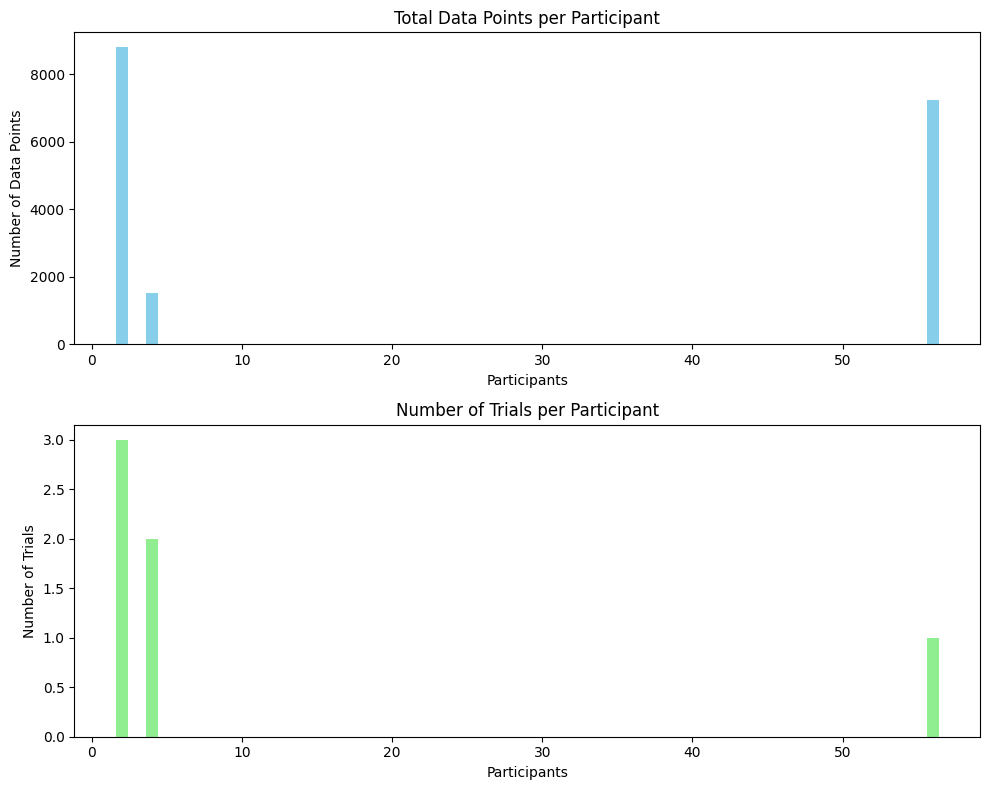

In [7]:
participants = list(participant_data_count.keys())  #Participant IDs
data_points = [participant_data_count[participant] for participant in participants]
num_trials = [len(participant_trials[participant]) for participant in participants]

##Subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

## bar chart for total data points per participant
ax[0].bar(participants, data_points, color='skyblue')
ax[0].set_title('Total Data Points per Participant')
ax[0].set_xlabel('Participants')
ax[0].set_ylabel('Number of Data Points')

#bar chart for number of trials
ax[1].bar(participants, num_trials, color='lightgreen')
ax[1].set_title('Number of Trials per Participant')
ax[1].set_xlabel('Participants')
ax[1].set_ylabel('Number of Trials')

plt.tight_layout()
plt.show()


## Combining csv data

In [20]:
## combining csv files
import os
import pandas as pd

folder_path = "../data/eye_movement_type"
output_file = "../data/eye_movement_type/combined_data.csv"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dataframes = []

# Loop through
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv(output_file, index=False)
print(f"Combined data saved to {output_file}")


Combined data saved to ../data/eye_movement_type/combined_data.csv


## Machine learning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft

In [21]:
df = pd.read_csv("../data/eye_movement_type/combined_data.csv")
df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,6103,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6104,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6105,48556071,515022640242,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
3,6106,48564392,515022648563,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
4,6107,48572740,515022656911,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,15622,63899509,620588764860,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN
52649,15623,63907845,620588773196,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN
52650,15624,63916183,620588781534,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN
52651,15625,63924508,620588789859,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['Unnamed: 0', 'Recording timestamp', 'Computer timestamp', 'Sensor',
       'Project name', 'Export date', 'Participant name', 'Recording name',
       'Recording date', 'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Eyetracker timestamp', 'Event',
       'Event value', 'Gaze point X', 'Gaze point Y', 'Gaze point left X',
       'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
       'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Eye position left X (DACSmm)',
       'Eye position left Y (DACSmm)', 'Eye po

In [23]:
df["Participant name"].unique()

array(['Participant0002', 'Participant0056'], dtype=object)

/tmp/ipykernel_28017/2153399780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Participant name", data=df, palette="Set2")


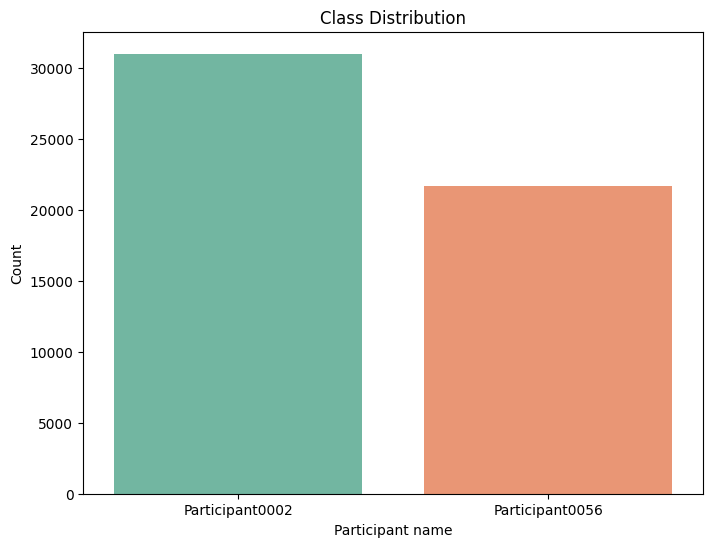

In [24]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Participant name", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Participant name")
plt.ylabel("Count")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,6103,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6104,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6105,48556071,515022640242,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
3,6106,48564392,515022648563,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
4,6107,48572740,515022656911,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35097,15622,63899509,620588764860,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN
35098,15623,63907845,620588773196,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN
35099,15624,63916183,620588781534,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN
35100,15625,63924508,620588789859,Eye Tracker,Participant0056,08.09.2021,Participant0056,Recording2,08.09.2021,08.09.2021,...,NaN,Fixation,108.0,139.0,630.0,635.0,NaN,NaN,NaN,NaN


In [25]:
#columns of interest
columns_of_interest = [
    "Gaze point X", "Gaze point Y", "Gaze event duration", 
    "Gaze direction left X", "Gaze direction left Y", "Gaze direction left Z",
    "Pupil diameter left", "Pupil diameter right",
    "Fixation point X", "Fixation point Y",
    "Gaze point left X", "Gaze point right X",
    "Gaze point left Y", "Gaze point right Y",
    "Participant name"
]


In [26]:
# Filter the dataframe to include only the relevant columns
df = df[columns_of_interest]
df

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y,Participant name
0,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participant0002
1,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participant0002
2,1186.0,383.0,92.0,"0,22995","0,10024","-0,96803","2,86",NaN,1237.0,347.0,1186.0,NaN,383.0,NaN,Participant0002
3,1223.0,364.0,92.0,"0,22718","0,09740","-0,96897",NaN,NaN,1237.0,347.0,1181.0,1266.0,376.0,353.0,Participant0002
4,1238.0,356.0,92.0,"0,23035","0,09865","-0,96810",NaN,NaN,1237.0,347.0,1191.0,1285.0,371.0,341.0,Participant0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,680.0,635.0,108.0,NaN,NaN,NaN,NaN,"2,67",630.0,635.0,NaN,680.0,NaN,635.0,Participant0056
52649,625.0,648.0,108.0,"-0,15668","0,19259","-0,96869",NaN,NaN,630.0,635.0,569.0,681.0,660.0,635.0,Participant0056
52650,627.0,637.0,108.0,"-0,15492","0,18315","-0,97080",NaN,NaN,630.0,635.0,573.0,680.0,644.0,630.0,Participant0056
52651,682.0,629.0,108.0,NaN,NaN,NaN,NaN,"2,72",630.0,635.0,NaN,682.0,NaN,629.0,Participant0056


In [27]:
# Clean the data: Replace commas with dots and convert columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df.loc[:, col] = df[col].str.replace(',', '.').astype(float, errors='ignore')

df

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y,Participant name
0,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participant0002
1,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participant0002
2,1186.0,383.0,92.0,0.22995,0.10024,-0.96803,2.86,NaN,1237.0,347.0,1186.0,NaN,383.0,NaN,Participant0002
3,1223.0,364.0,92.0,0.22718,0.0974,-0.96897,NaN,NaN,1237.0,347.0,1181.0,1266.0,376.0,353.0,Participant0002
4,1238.0,356.0,92.0,0.23035,0.09865,-0.9681,NaN,NaN,1237.0,347.0,1191.0,1285.0,371.0,341.0,Participant0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,680.0,635.0,108.0,NaN,NaN,NaN,NaN,2.67,630.0,635.0,NaN,680.0,NaN,635.0,Participant0056
52649,625.0,648.0,108.0,-0.15668,0.19259,-0.96869,NaN,NaN,630.0,635.0,569.0,681.0,660.0,635.0,Participant0056
52650,627.0,637.0,108.0,-0.15492,0.18315,-0.9708,NaN,NaN,630.0,635.0,573.0,680.0,644.0,630.0,Participant0056
52651,682.0,629.0,108.0,NaN,NaN,NaN,NaN,2.72,630.0,635.0,NaN,682.0,NaN,629.0,Participant0056


In [28]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52653 entries, 0 to 52652
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gaze point X           45852 non-null  float64
 1   Gaze point Y           45852 non-null  float64
 2   Gaze event duration    52653 non-null  float64
 3   Gaze direction left X  40530 non-null  object 
 4   Gaze direction left Y  40530 non-null  object 
 5   Gaze direction left Z  40530 non-null  object 
 6   Pupil diameter left    9717 non-null   object 
 7   Pupil diameter right   12159 non-null  object 
 8   Fixation point X       27693 non-null  float64
 9   Fixation point Y       27693 non-null  float64
 10  Gaze point left X      40530 non-null  float64
 11  Gaze point right X     41199 non-null  float64
 12  Gaze point left Y      40530 non-null  float64
 13  Gaze point right Y     41199 non-null  float64
 14  Participant name       52653 non-nul

In [29]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Gaze point X  Gaze point Y  Gaze event duration  Fixation point X  \
count  45852.000000  45852.000000         52653.000000      27693.000000   
mean     882.085383    442.063465           178.541280        869.878128   
std      270.412505    247.858044           232.694388        242.549705   
min      -63.000000   -213.000000             8.000000         75.000000   
25%      722.000000    279.000000            17.000000        714.000000   
50%      904.000000    442.000000            92.000000        904.000000   
75%     1030.000000    610.000000           250.000000       1008.000000   
max     2176.000000   1887.000000          1300.000000       1681.000000   

       Fixation point Y  Gaze point left X  Gaze point right X  \
count      27693.000000       40530.000000        41199.000000   
mean         414.877695         835.281125          927.662201   
std          243.543795         269.397077          253.567417   
min         -160.000000       

In [30]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gaze point X              6801
Gaze point Y              6801
Gaze event duration          0
Gaze direction left X    12123
Gaze direction left Y    12123
Gaze direction left Z    12123
Pupil diameter left      42936
Pupil diameter right     40494
Fixation point X         24960
Fixation point Y         24960
Gaze point left X        12123
Gaze point right X       11454
Gaze point left Y        12123
Gaze point right Y       11454
Participant name             0
dtype: int64


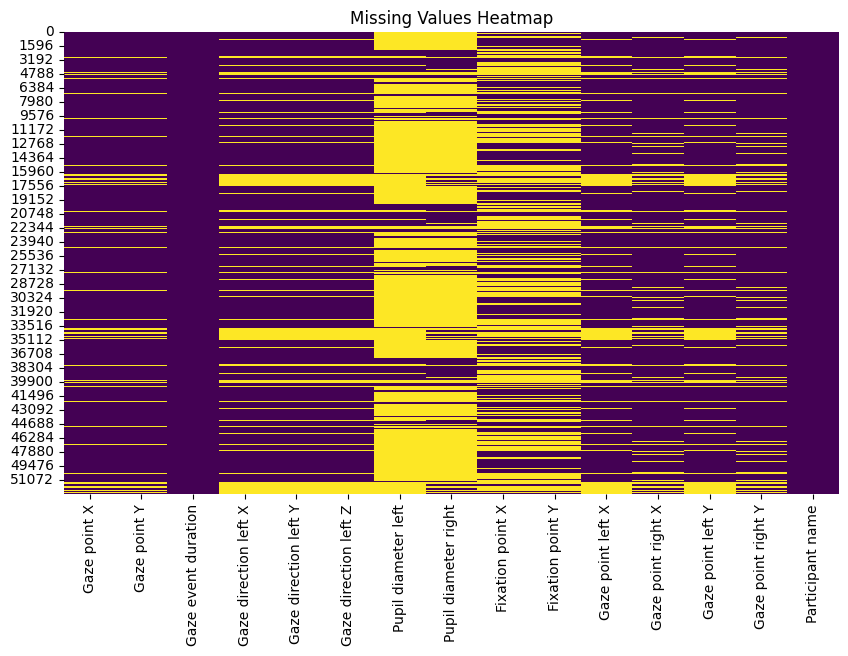

In [31]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [32]:
# imputing values:
def impute_missing_values(df, columns, strategy="median"):
    """
    Impute missing values in the specified columns of the DataFrame in place.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        columns (list): List of column names to impute.
        strategy (str): Imputation strategy - "median", "mean", or "mode".
    """
    for col in columns:
        if col in df.columns:
            if strategy == "median":
                imputed_value = df[col].median()
            elif strategy == "mean":
                imputed_value = df[col].mean()
            elif strategy == "mode":
                imputed_value = df[col].mode()[0]  # Get the first mode value
            else:
                raise ValueError("Invalid strategy. Use 'median', 'mean', or 'mode'.")
            
            # Impute missing values in-place
            df[col].fillna(imputed_value, inplace=True)
        else:
            print(f"Column '{col}' not found in DataFrame.")


In [33]:
df

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y,Participant name
0,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participant0002
1,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participant0002
2,1186.0,383.0,92.0,0.22995,0.10024,-0.96803,2.86,NaN,1237.0,347.0,1186.0,NaN,383.0,NaN,Participant0002
3,1223.0,364.0,92.0,0.22718,0.0974,-0.96897,NaN,NaN,1237.0,347.0,1181.0,1266.0,376.0,353.0,Participant0002
4,1238.0,356.0,92.0,0.23035,0.09865,-0.9681,NaN,NaN,1237.0,347.0,1191.0,1285.0,371.0,341.0,Participant0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,680.0,635.0,108.0,NaN,NaN,NaN,NaN,2.67,630.0,635.0,NaN,680.0,NaN,635.0,Participant0056
52649,625.0,648.0,108.0,-0.15668,0.19259,-0.96869,NaN,NaN,630.0,635.0,569.0,681.0,660.0,635.0,Participant0056
52650,627.0,637.0,108.0,-0.15492,0.18315,-0.9708,NaN,NaN,630.0,635.0,573.0,680.0,644.0,630.0,Participant0056
52651,682.0,629.0,108.0,NaN,NaN,NaN,NaN,2.72,630.0,635.0,NaN,682.0,NaN,629.0,Participant0056


In [34]:
columns_of_interest = [
    "Gaze point X", "Gaze point Y", "Gaze event duration", 
    "Gaze direction left X", "Gaze direction left Y", "Gaze direction left Z",
    "Pupil diameter left", "Pupil diameter right",
    "Fixation point X", "Fixation point Y",
    "Gaze point left X", "Gaze point right X",
    "Gaze point left Y", "Gaze point right Y"
]

impute_missing_values(df, columns_of_interest, strategy="median")

# Check for missing values after imputation
print("Missing values after imputation:")
print(df.isnull().sum())

##########


Missing values after imputation:
Gaze point X             0
Gaze point Y             0
Gaze event duration      0
Gaze direction left X    0
Gaze direction left Y    0
Gaze direction left Z    0
Pupil diameter left      0
Pupil diameter right     0
Fixation point X         0
Fixation point Y         0
Gaze point left X        0
Gaze point right X       0
Gaze point left Y        0
Gaze point right Y       0
Participant name         0
dtype: int64


/tmp/ipykernel_28017/161994833.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(imputed_value, inplace=True)
/tmp/ipykernel_28017/161994833.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(imputed_value, inplace=True)
/tmp/ipykernel_28017/161994833.py:23: FutureWarning: A value is trying to be set on a cop

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52653 entries, 0 to 52652
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gaze point X           52653 non-null  float64
 1   Gaze point Y           52653 non-null  float64
 2   Gaze event duration    52653 non-null  float64
 3   Gaze direction left X  52653 non-null  float64
 4   Gaze direction left Y  52653 non-null  float64
 5   Gaze direction left Z  52653 non-null  float64
 6   Pupil diameter left    52653 non-null  float64
 7   Pupil diameter right   52653 non-null  float64
 8   Fixation point X       52653 non-null  float64
 9   Fixation point Y       52653 non-null  float64
 10  Gaze point left X      52653 non-null  float64
 11  Gaze point right X     52653 non-null  float64
 12  Gaze point left Y      52653 non-null  float64
 13  Gaze point right Y     52653 non-null  float64
 14  Participant name       52653 non-null  object 
dtypes:

In [36]:
# Handle missing values
df = df.dropna() 
df

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y,Participant name
0,904.0,442.0,133.0,0.04980,0.116415,-0.98455,3.01,2.98,904.0,415.0,862.0,946.0,441.0,417.0,Participant0002
1,904.0,442.0,133.0,0.04980,0.116415,-0.98455,3.01,2.98,904.0,415.0,862.0,946.0,441.0,417.0,Participant0002
2,1186.0,383.0,92.0,0.22995,0.100240,-0.96803,2.86,2.98,1237.0,347.0,1186.0,946.0,383.0,417.0,Participant0002
3,1223.0,364.0,92.0,0.22718,0.097400,-0.96897,3.01,2.98,1237.0,347.0,1181.0,1266.0,376.0,353.0,Participant0002
4,1238.0,356.0,92.0,0.23035,0.098650,-0.96810,3.01,2.98,1237.0,347.0,1191.0,1285.0,371.0,341.0,Participant0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,680.0,635.0,108.0,0.04980,0.116415,-0.98455,3.01,2.67,630.0,635.0,862.0,680.0,441.0,635.0,Participant0056
52649,625.0,648.0,108.0,-0.15668,0.192590,-0.96869,3.01,2.98,630.0,635.0,569.0,681.0,660.0,635.0,Participant0056
52650,627.0,637.0,108.0,-0.15492,0.183150,-0.97080,3.01,2.98,630.0,635.0,573.0,680.0,644.0,630.0,Participant0056
52651,682.0,629.0,108.0,0.04980,0.116415,-0.98455,3.01,2.72,630.0,635.0,862.0,682.0,441.0,629.0,Participant0056


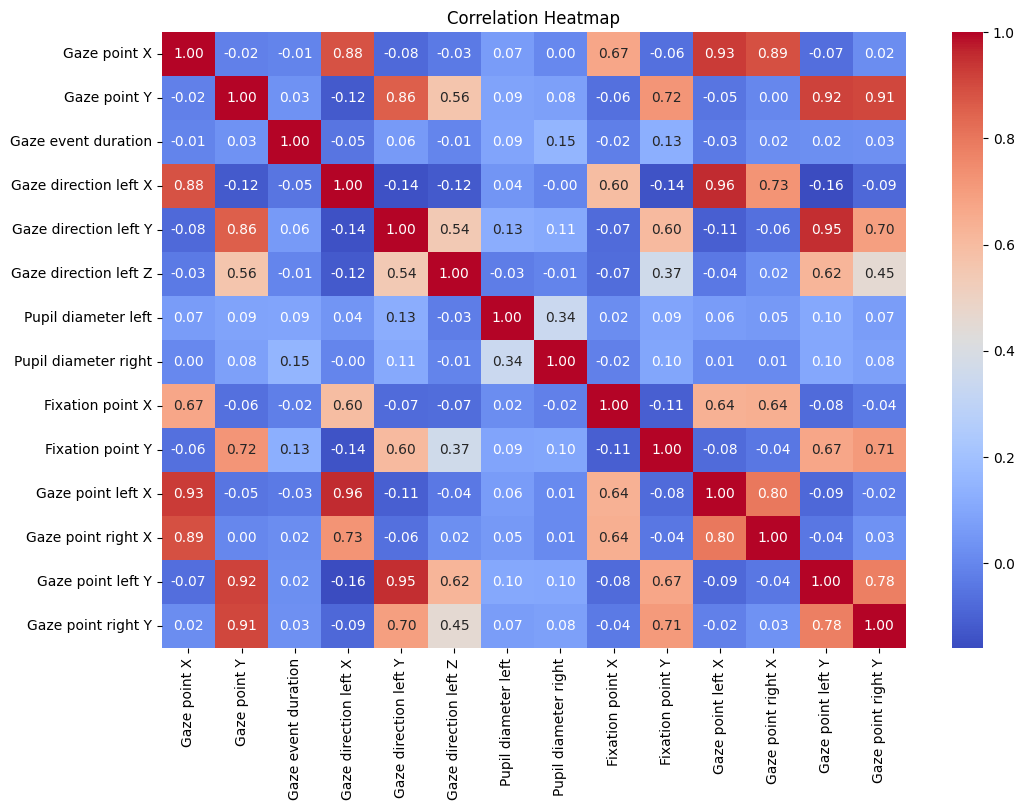

In [37]:
df_numeric = df.drop("Participant name", axis = 1)
plt.figure(figsize=(12, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

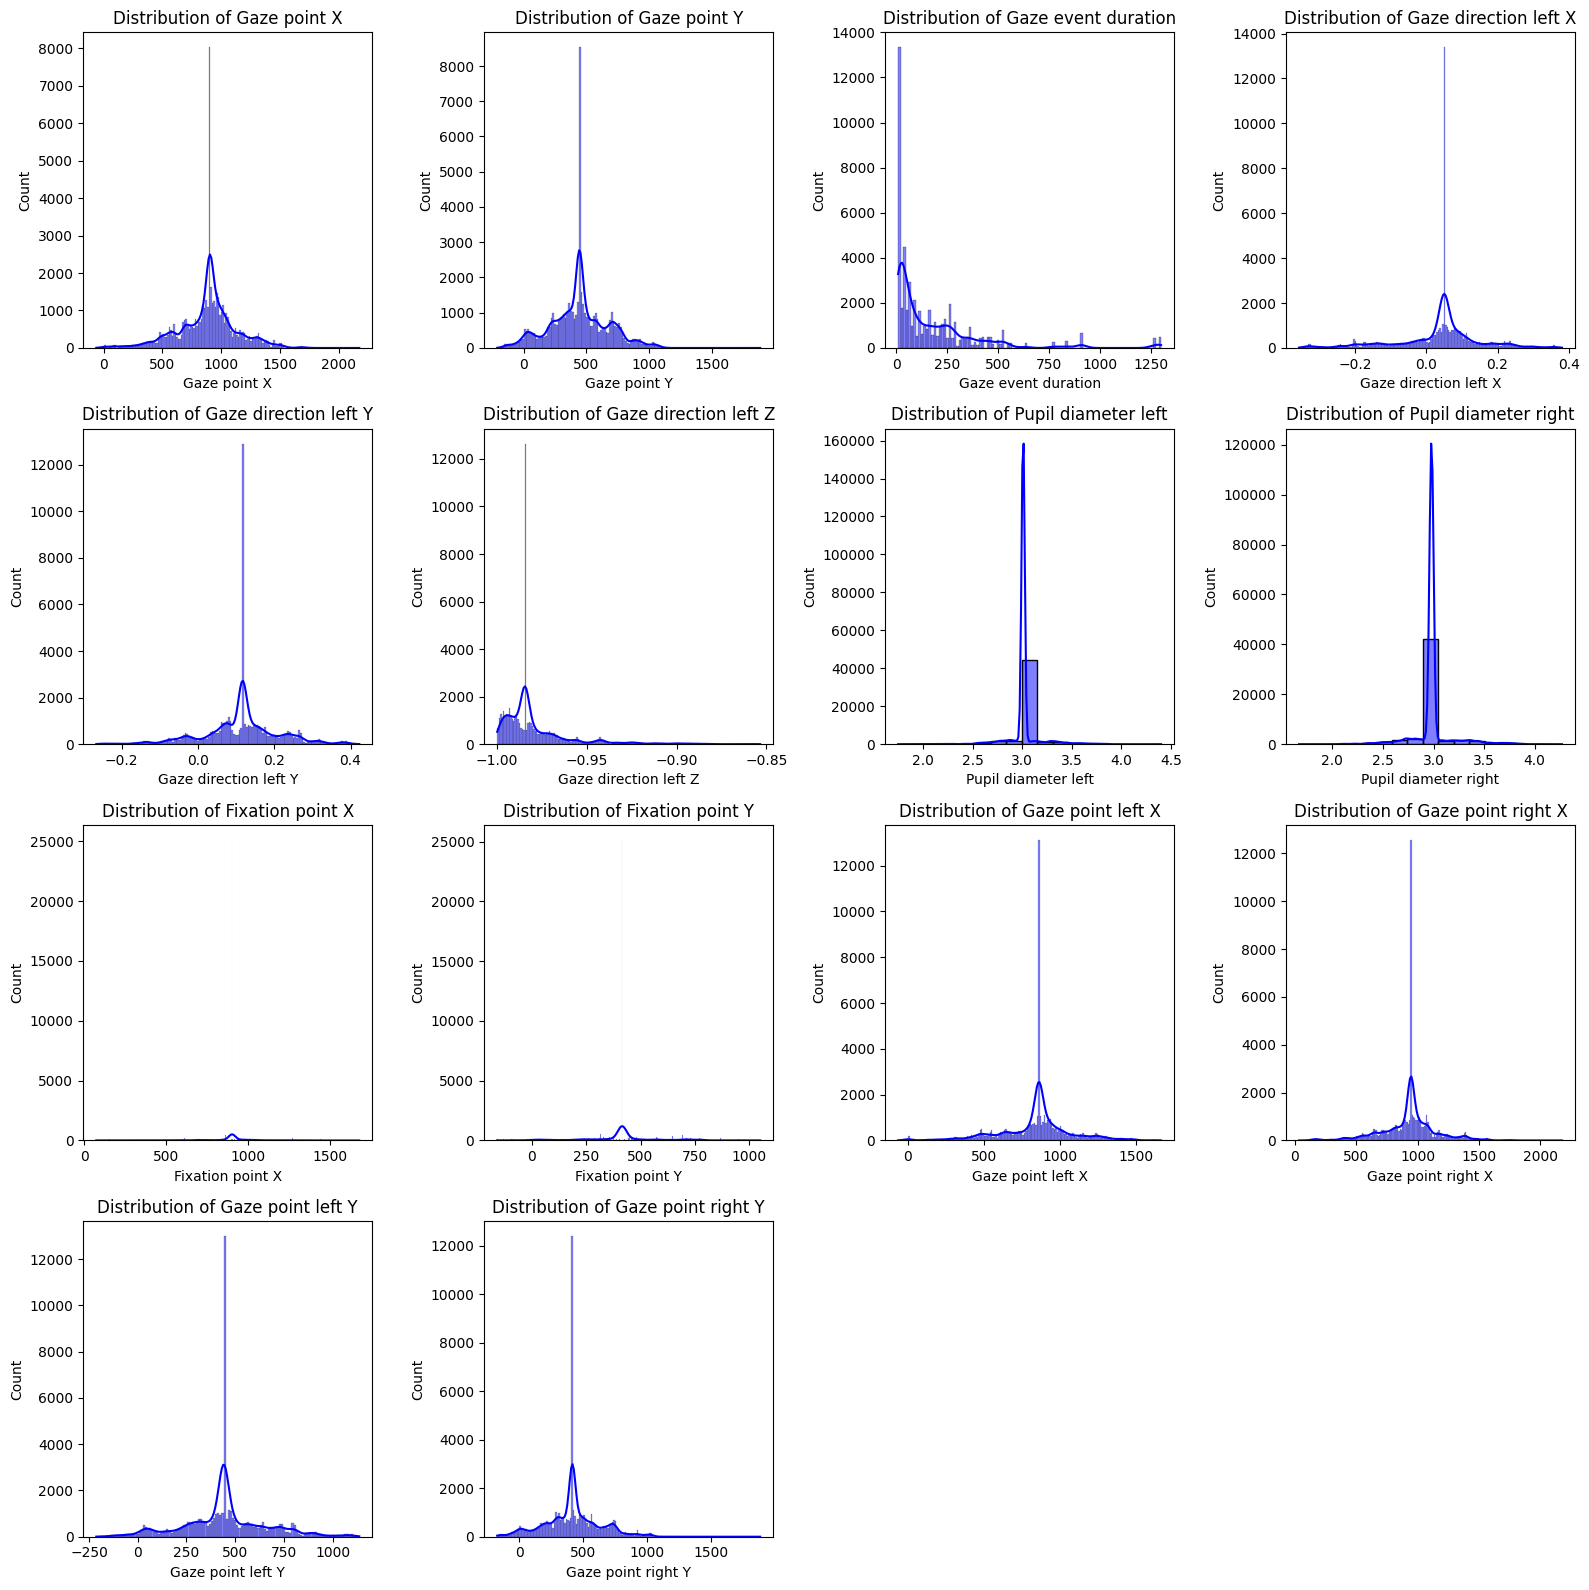

In [38]:

import math

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_cols = 4 
num_rows = math.ceil(len(numeric_columns) / num_cols) #calculating rrequired rows

plt.figure(figsize=(num_cols * 4, num_rows * 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

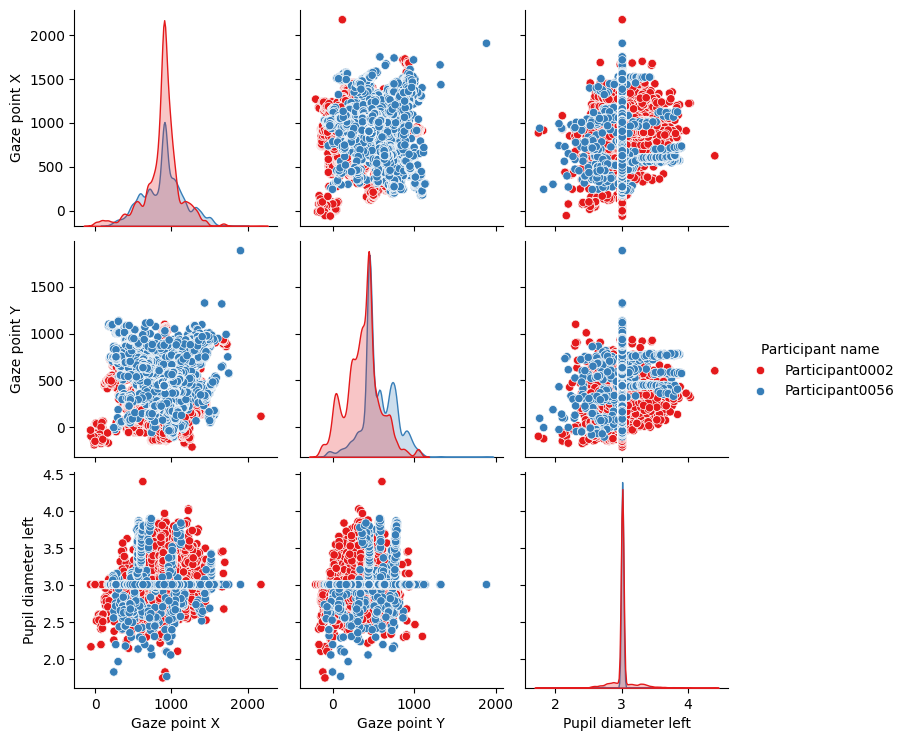

In [39]:
# Pairplot for Pairwise Relationships (only for a subset to avoid clutter)
selected_cols = ["Gaze point X", "Gaze point Y", "Pupil diameter left", "Participant name"]
sns.pairplot(df[selected_cols], hue="Participant name", palette="Set1")
plt.show()

/tmp/ipykernel_28017/2342658198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette="Set3")
/tmp/ipykernel_28017/2342658198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette="Set3")
/tmp/ipykernel_28017/2342658198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette="Set3")
/tmp/ipykernel_28017/2342658198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

ValueError: num must be an integer with 1 <= num <= 12, not 13

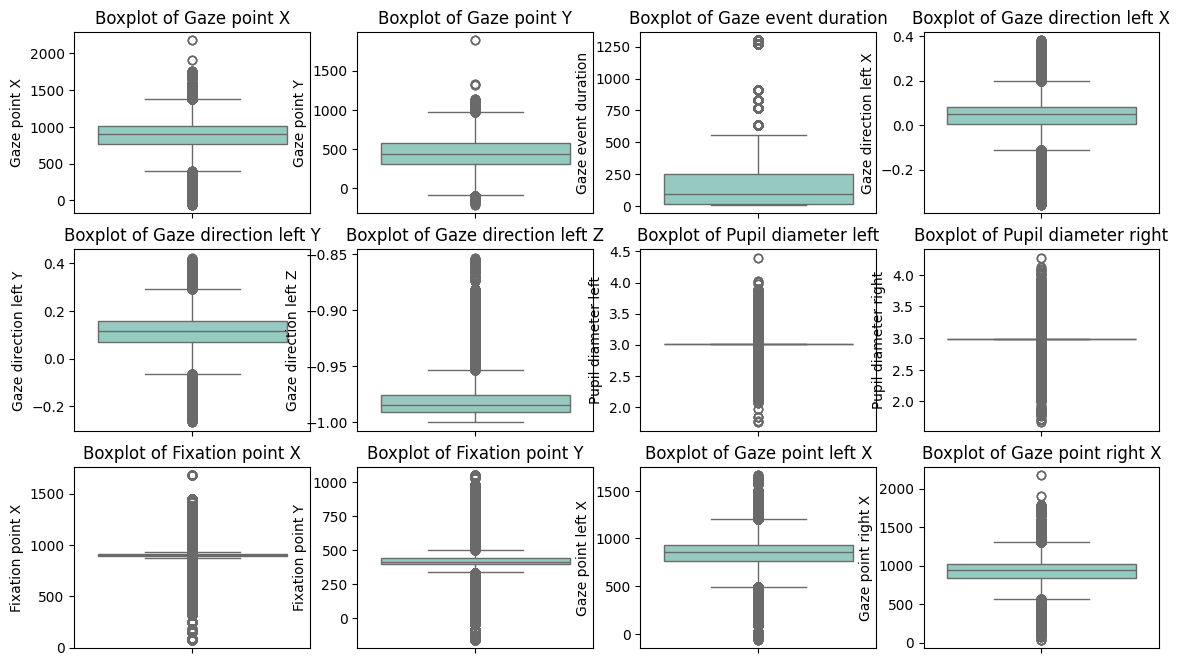

In [40]:
# Boxplot to Detect Outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=col, data=df, palette="Set3")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_28017/2153399780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Participant name", data=df, palette="Set2")


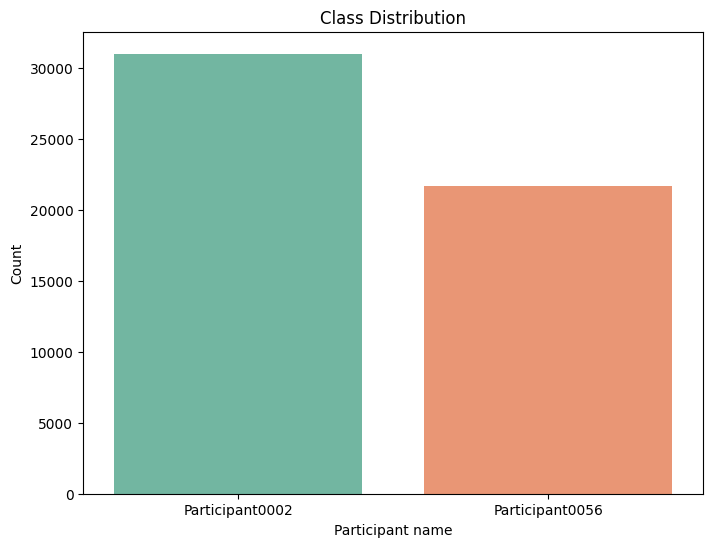

In [41]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Participant name", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Participant name")
plt.ylabel("Count")
plt.show()

## Feature Engineering

In [ ]:
#Grouping data points as per the participant:
grouped = df.groupby('Participant name').agg({
    'Gaze point X': list,
    'Gaze point Y': list,
    'Gaze event duration': list,
    'Pupil diameter left': list,
    'Pupil diameter right': list,
    'Gaze point left X': list,
    'Gaze point right X': list,
    'Gaze point left Y': list,
    'Gaze point right Y': list,
}).reset_index()

grouped

,Participant name,Gaze point X,Gaze point Y,Gaze event duration,Pupil diameter left,Pupil diameter right,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y
0,Participant0002,"[904.0, 904.0, 1186.0, 1223.0, 1238.0, 1185.0,...","[442.0, 442.0, 383.0, 364.0, 356.0, 348.0, 349...","[133.0, 133.0, 92.0, 92.0, 92.0, 92.0, 92.0, 9...","[3.01, 3.01, 2.86, 3.01, 3.01, 3.57, 3.01, 3.0...","[2.98, 2.98, 2.98, 2.98, 2.98, 2.98, 2.98, 2.9...","[862.0, 862.0, 1186.0, 1181.0, 1191.0, 1185.0,...","[946.0, 946.0, 946.0, 1266.0, 1285.0, 946.0, 1...","[441.0, 441.0, 383.0, 376.0, 371.0, 348.0, 366...","[417.0, 417.0, 417.0, 353.0, 341.0, 417.0, 333..."
1,Participant0056,"[904.0, 904.0, 920.0, 922.0, 904.0, 920.0, 918...","[442.0, 442.0, 512.0, 509.0, 442.0, 506.0, 510...","[8.0, 8.0, 17.0, 17.0, 8.0, 208.0, 208.0, 208....","[3.01, 3.01, 3.01, 3.01, 3.01, 3.01, 3.01, 3.0...","[2.98, 2.98, 2.98, 2.98, 2.98, 2.98, 2.98, 2.8...","[862.0, 862.0, 868.0, 873.0, 862.0, 871.0, 871...","[946.0, 946.0, 971.0, 970.0, 946.0, 970.0, 965...","[441.0, 441.0, 520.0, 514.0, 441.0, 505.0, 508...","[417.0, 417.0, 504.0, 504.0, 417.0, 508.0, 511..."


In [ ]:
## testing in loop:
for _, row in grouped.iterrows():
    participant_name = row['Participant name']
    
    gaze_x = row['Gaze point X']
    gaze_y = row['Gaze point Y']
    fixation_durations = row['Gaze event duration']
    pupil_diameter_left = row['Pupil diameter left']
    pupil_diameter_right = row['Pupil diameter right']
    gaze_point_left_x = row['Gaze point left X']
    gaze_point_right_x = row['Gaze point right X']
    gaze_point_left_y = row['Gaze point left Y']
    gaze_point_right_y = row['Gaze point right Y']

In [ ]:
# gaze_x = df["Gaze point X"].values
# gaze_y = df["Gaze point Y"].values


# fixation_durations = df["Gaze event duration"].values

# pupil_diameter_left = df["Pupil diameter left"].values
# pupil_diameter_right = df["Pupil diameter right"].values
# gaze_point_left_x = df["Gaze point left X"].values
# gaze_point_right_x = df["Gaze point right X"].values
# gaze_point_left_y = df["Gaze point left Y"].values
# gaze_point_right_y = df["Gaze point right Y"].values


# participant_name = df["Participant name"].values

In [88]:
# participant_name

In [ ]:
df["Pupil diameter right"]

In [61]:
df.describe()

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y
count,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000,52653.000000
mean,884.916016,442.055268,178.541280,0.036085,0.113061,-0.979274,3.016738,2.987104,886.053501,414.935673,841.432967,931.651359,446.417184,416.804228
std,252.451456,231.296995,232.694388,0.116200,0.098342,0.019897,0.142576,0.180412,176.725118,176.622822,236.624466,224.424878,212.997657,215.771811
min,-63.000000,-213.000000,8.000000,-0.358500,-0.266790,-1.000000,1.750000,1.670000,75.000000,-160.000000,-63.000000,35.000000,-213.000000,-171.000000
25%,763.000000,308.000000,17.000000,0.005410,0.069520,-0.990990,3.010000,2.980000,892.000000,396.000000,760.000000,838.000000,342.000000,302.000000
50%,904.000000,442.000000,92.000000,0.049800,0.116415,-0.984550,3.010000,2.980000,904.000000,415.000000,862.000000,946.000000,441.000000,417.000000
75%,1009.000000,575.000000,250.000000,0.082820,0.158290,-0.975920,3.010000,2.980000,909.000000,438.000000,936.000000,1023.000000,547.000000,520.000000
max,2176.000000,1887.000000,1300.000000,0.381320,0.422860,-0.853390,4.400000,4.270000,1681.000000,1051.000000,1665.000000,2176.000000,1137.000000,1887.000000


In [62]:
# Function to extract time-domain features
def extract_time_domain_features(gaze_x, gaze_y):
    mean_x = np.mean(gaze_x)
    std_x = np.std(gaze_x)
    mean_y = np.mean(gaze_y)
    std_y = np.std(gaze_y)
    
    # Velocity (difference between consecutive points)
    velocity_x = np.diff(gaze_x)
    velocity_y = np.diff(gaze_y)
    mean_velocity_x = np.mean(velocity_x)
    std_velocity_x = np.std(velocity_x)
    mean_velocity_y = np.mean(velocity_y)
    std_velocity_y = np.std(velocity_y)

    return [mean_x, std_x, mean_y, std_y, mean_velocity_x, std_velocity_x, mean_velocity_y, std_velocity_y]

In [63]:
def extract_frequency_domain_features(gaze_x, gaze_y):
    ##FFT to gaze coordinates (X, Y)
    fft_x = fft(gaze_x)
    fft_y = fft(gaze_y)
    
    ## Get the power spectral density (absolute value squared)
    psd_x = np.abs(fft_x) ** 2
    psd_y = np.abs(fft_y) ** 2
    
    #Dominant frequency (index of the max value)
    dominant_freq_x = np.argmax(psd_x)
    dominant_freq_y = np.argmax(psd_y)
    
    #Power at dominant frequency
    power_x = psd_x[dominant_freq_x]
    power_y = psd_y[dominant_freq_y]
    
    return [dominant_freq_x, power_x, dominant_freq_y, power_y]


In [64]:
def extract_spatial_features(gaze_x, gaze_y):
    # Mean and standard deviation of gaze point dispersion
    mean_dispersion_x = np.mean(np.abs(gaze_x - np.mean(gaze_x)))
    std_dispersion_x = np.std(np.abs(gaze_x - np.mean(gaze_x)))
    mean_dispersion_y = np.mean(np.abs(gaze_y - np.mean(gaze_y)))
    std_dispersion_y = np.std(np.abs(gaze_y - np.mean(gaze_y)))
    
    # Distance between consecutive gaze points
    distances = np.sqrt(np.diff(gaze_x)**2 + np.diff(gaze_y)**2)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    
    ##Angles between consecutive gaze points
    angles = np.arctan2(np.diff(gaze_y), np.diff(gaze_x))
    mean_angle = np.mean(angles)
    std_angle = np.std(angles)
    
    return [mean_dispersion_x, std_dispersion_x, mean_dispersion_y, std_dispersion_y, mean_distance, std_distance, mean_angle, std_angle]


In [65]:
# behavioral features
def extract_behavioral_features(fixation_durations, pupil_diameter_left, pupil_diameter_right, gaze_point_left_x, gaze_point_right_x, gaze_point_left_y, gaze_point_right_y):
    # Fixation duration statistics
    mean_fixation_duration = np.mean(fixation_durations)
    std_fixation_duration = np.std(fixation_durations)
    
    # Pupil diameter asymmetry
    pupil_asymmetry = pupil_diameter_left - pupil_diameter_right
    mean_pupil_asymmetry = np.mean(pupil_asymmetry)
    std_pupil_asymmetry = np.std(pupil_asymmetry)
    
    # Left-right eye gaze asymmetry
    gaze_asymmetry_x = gaze_point_left_x - gaze_point_right_x
    gaze_asymmetry_y = gaze_point_left_y - gaze_point_right_y
    mean_gaze_asymmetry_x = np.mean(gaze_asymmetry_x)
    std_gaze_asymmetry_x = np.std(gaze_asymmetry_x)
    mean_gaze_asymmetry_y = np.mean(gaze_asymmetry_y)
    std_gaze_asymmetry_y = np.std(gaze_asymmetry_y)
    
    return [
        mean_fixation_duration, std_fixation_duration,
        mean_pupil_asymmetry, std_pupil_asymmetry,
        mean_gaze_asymmetry_x, std_gaze_asymmetry_x,
        mean_gaze_asymmetry_y, std_gaze_asymmetry_y
    ]


In [66]:

def extract_frequency_domain_features_enhanced(gaze_x, gaze_y):
    fft_x = fft(gaze_x)
    fft_y = fft(gaze_y)
    
    ##power spectral density
    psd_x = np.abs(fft_x) ** 2
    psd_y = np.abs(fft_y) ** 2
    
    # Divide into bands (low, mid, high frequencies)
    n = len(psd_x)
    low_band_x = np.sum(psd_x[:n // 3])
    mid_band_x = np.sum(psd_x[n // 3: 2 * n // 3])
    high_band_x = np.sum(psd_x[2 * n // 3:])
    
    low_band_y = np.sum(psd_y[:n // 3])
    mid_band_y = np.sum(psd_y[n // 3: 2 * n // 3])
    high_band_y = np.sum(psd_y[2 * n // 3:])
    
    # Spectral entropy
    total_power_x = np.sum(psd_x)
    entropy_x = -np.sum((psd_x / total_power_x) * np.log2(psd_x / total_power_x + 1e-12))  # Avoid log(0)
    total_power_y = np.sum(psd_y)
    entropy_y = -np.sum((psd_y / total_power_y) * np.log2(psd_y / total_power_y + 1e-12))  # Avoid log(0)
    
    return [low_band_x, mid_band_x, high_band_x, entropy_x, low_band_y, mid_band_y, high_band_y, entropy_y]


In [67]:
# Combine all feature extraction
def extract_all_features(gaze_x, gaze_y, fixation_durations, pupil_diameter_left, pupil_diameter_right, gaze_point_left_x, gaze_point_right_x, gaze_point_left_y, gaze_point_right_y):
    time_features = extract_time_domain_features(gaze_x, gaze_y)
    spatial_features = extract_spatial_features(gaze_x, gaze_y)
    behavioral_features = extract_behavioral_features(
        fixation_durations,
        pupil_diameter_left, pupil_diameter_right,
        gaze_point_left_x, gaze_point_right_x,
        gaze_point_left_y, gaze_point_right_y
    )
    freq_features = extract_frequency_domain_features_enhanced(gaze_x, gaze_y)
    
    # Combine all features
    return time_features + spatial_features + behavioral_features + freq_features


In [68]:
len(gaze_x)

21669

In [70]:
time_domain_features = []

for i in range(0, len(gaze_x)):  # Step size: 100
    # Extract time-domain features
    time_domain_features.append(extract_time_domain_features(gaze_x[i:i+100], gaze_y[i:i+100]))

In [71]:

len(time_domain_features)

21669

In [90]:
time_domain_features = []
frequency_domain_features = []
spatial_features = []
behavioral_features = []
enhanced_frequency_features = []
participant_names = []

for _, row in grouped.iterrows():
    participant_name = row['Participant name']
    
    gaze_x = np.array(row['Gaze point X'])
    gaze_y = np.array(row['Gaze point Y'])
    fixation_durations = np.array(row['Gaze event duration'])
    pupil_diameter_left = np.array(row['Pupil diameter left'])
    pupil_diameter_right = np.array(row['Pupil diameter right'])
    gaze_point_left_x = np.array(row['Gaze point left X'])
    gaze_point_right_x = np.array(row['Gaze point right X'])
    gaze_point_left_y = np.array(row['Gaze point left Y'])
    gaze_point_right_y = np.array(row['Gaze point right Y'])

    ##Iterate through the dataset with a window size of 100 data points
    for i in range(0, len(gaze_x)):
        
        time_domain_features.append(extract_time_domain_features(gaze_x[i:i+100], gaze_y[i:i+100]))
        frequency_domain_features.append(extract_frequency_domain_features(gaze_x[i:i+100], gaze_y[i:i+100]))
        spatial_features.append(extract_spatial_features(gaze_x[i:i+100], gaze_y[i:i+100]))
        behavioral_features.append(extract_behavioral_features(
            fixation_durations[i:i+100],
            pupil_diameter_left[i:i+100], pupil_diameter_right[i:i+100],
            gaze_point_left_x[i:i+100], gaze_point_right_x[i:i+100],
            gaze_point_left_y[i:i+100], gaze_point_right_y[i:i+100]
        ))
        enhanced_frequency_features.append(extract_frequency_domain_features_enhanced(gaze_x[i:i+100], gaze_y[i:i+100]))

        participant_names.append(participant_name)

In [91]:
# Convert extracted features into DataFrames
time_domain_df = pd.DataFrame(time_domain_features, columns=["mean_x", "std_x", "mean_y", "std_y", 
                                                             "mean_velocity_x", "std_velocity_x", 
                                                             "mean_velocity_y", "std_velocity_y"])

frequency_domain_df = pd.DataFrame(frequency_domain_features, columns=["dominant_freq_x", "power_x", 
                                                                        "dominant_freq_y", "power_y"])

spatial_df = pd.DataFrame(spatial_features, columns=["mean_dispersion_x", "std_dispersion_x", 
                                                     "mean_dispersion_y", "std_dispersion_y", 
                                                     "mean_distance", "std_distance", 
                                                     "mean_angle", "std_angle"])

behavioral_df = pd.DataFrame(behavioral_features, columns=["mean_fixation_duration", "std_fixation_duration", 
                                                           "mean_pupil_asymmetry", "std_pupil_asymmetry", 
                                                           "mean_gaze_asymmetry_x", "std_gaze_asymmetry_x", 
                                                           "mean_gaze_asymmetry_y", "std_gaze_asymmetry_y"])

enhanced_frequency_df = pd.DataFrame(enhanced_frequency_features, columns=["low_band_x", "mid_band_x", "high_band_x", "entropy_x", 
                                                                            "low_band_y", "mid_band_y", "high_band_y", "entropy_y"])

# Combine all features into a single DataFrame
all_features_df = pd.concat([time_domain_df, frequency_domain_df, spatial_df, behavioral_df, enhanced_frequency_df], axis=1)


In [92]:
all_features_df

,mean_x,std_x,mean_y,std_y,mean_velocity_x,std_velocity_x,mean_velocity_y,std_velocity_y,dominant_freq_x,power_x,...,mean_gaze_asymmetry_y,std_gaze_asymmetry_y,low_band_x,mid_band_x,high_band_x,entropy_x,low_band_y,mid_band_y,high_band_y,entropy_y
0,963.53,161.478695,366.630000,76.509693,0.000000,41.039523,0.191919,17.427296,0,9.283901e+09,...,23.61,51.579821,9.413452e+09,1.626764e+06,1.295752e+08,2.559276e-01,1.373324e+09,2.317768e+05,2.915748e+07,3.466551e-01
1,963.54,161.475040,366.910000,76.835551,0.010101,41.039645,0.282828,17.449518,0,9.284093e+09,...,24.05,51.768596,9.413637e+09,1.630861e+06,1.295674e+08,2.558990e-01,1.375636e+09,2.181649e+05,2.941219e+07,3.489620e-01
2,963.54,161.475040,367.190000,77.159017,-2.848485,29.544476,0.878788,16.389990,0,9.284093e+09,...,24.48,51.944678,9.413637e+09,1.630861e+06,1.295674e+08,2.558990e-01,1.377924e+09,2.537639e+05,2.964258e+07,3.517698e-01
3,960.78,160.001099,368.170000,77.971669,-3.161616,29.283604,1.181818,16.296721,0,9.230982e+09,...,25.57,51.849639,9.358031e+09,1.763990e+06,1.271905e+08,2.541590e-01,1.385711e+09,3.190758e+05,3.025698e+07,3.575503e-01
4,957.74,157.863778,369.280000,78.691179,-3.222222,29.252145,1.202020,16.286562,0,9.172659e+09,...,26.10,52.090978,9.295964e+09,2.523313e+06,1.233816e+08,2.502684e-01,1.394457e+09,3.397436e+05,3.080382e+07,3.606454e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,648.00,26.959228,636.800000,6.209670,-13.500000,45.991847,0.000000,9.874209,0,1.049760e+07,...,-62.00,105.517771,1.049760e+07,9.085000e+03,9.085000e+03,2.102966e-02,1.013786e+07,4.820000e+02,4.820000e+02,1.584739e-03
52649,640.00,24.259019,637.250000,6.869316,0.333333,45.330882,-4.333333,7.408704,0,6.553600e+06,...,-29.00,92.046184,6.553600e+06,3.250000e+03,6.166000e+03,1.789052e-02,6.497401e+06,3.650000e+02,3.900000e+02,1.823033e-03
52650,645.00,26.166136,633.666667,3.399346,-0.500000,55.500000,-1.000000,7.000000,0,3.744225e+06,...,-47.00,100.003333,3.744225e+06,3.081000e+03,3.081000e+03,1.920856e-02,3.613801e+06,5.200000e+01,5.200000e+01,5.043978e-04
52651,654.00,28.000000,632.000000,3.000000,-56.000000,0.000000,6.000000,0.000000,0,1.710864e+06,...,-77.50,110.500000,0.000000e+00,1.710864e+06,3.136000e+03,1.927634e-02,0.000000e+00,1.597696e+06,3.600000e+01,3.803470e-04


In [94]:
len(participant_names)

52653

## Model Training

In [95]:
# Encode the target variable (Eye movement type) as numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(participant_names)

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features_df, target, test_size=0.2, random_state=42)

In [97]:
# Split data into features (X) and target (y)
X = df.drop(columns=["Participant name"])
y = df["Participant name"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [99]:
X_train

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y
23553,904.0,442.0,225.0,0.04980,0.116415,-0.98455,3.01,2.98,694.0,23.0,862.0,946.0,441.0,417.0
37684,594.0,321.0,167.0,0.04980,0.116415,-0.98455,3.01,2.79,539.0,336.0,862.0,594.0,441.0,321.0
8869,857.0,459.0,117.0,0.02662,0.138850,-0.98996,3.01,2.98,854.0,460.0,810.0,903.0,494.0,424.0
18752,742.0,190.0,350.0,-0.01467,0.019520,-0.99970,3.01,2.98,745.0,195.0,694.0,790.0,214.0,165.0
31950,1306.0,684.0,1300.0,0.23216,0.178650,-0.95613,3.01,2.98,1321.0,695.0,1237.0,1375.0,647.0,721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18447,1089.0,203.0,258.0,0.15026,0.030730,-0.98817,3.58,2.75,1092.0,215.0,1047.0,1132.0,219.0,186.0
49912,694.0,578.0,475.0,-0.13074,0.154370,-0.97933,3.01,2.98,695.0,574.0,617.0,771.0,594.0,561.0
42356,904.0,442.0,117.0,0.04980,0.116415,-0.98455,3.01,2.98,899.0,507.0,862.0,946.0,441.0,417.0
32904,618.0,724.0,17.0,-0.21500,0.245880,-0.94516,3.01,2.98,904.0,415.0,461.0,775.0,755.0,693.0


In [100]:
# Train a classification model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [102]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [103]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 98.20%
Testing Accuracy: 98.18%
Classification Report:
                 precision    recall  f1-score   support

Participant0002       1.00      0.97      0.98      6197
Participant0056       0.96      0.99      0.98      4334

       accuracy                           0.98     10531
      macro avg       0.98      0.98      0.98     10531
   weighted avg       0.98      0.98      0.98     10531



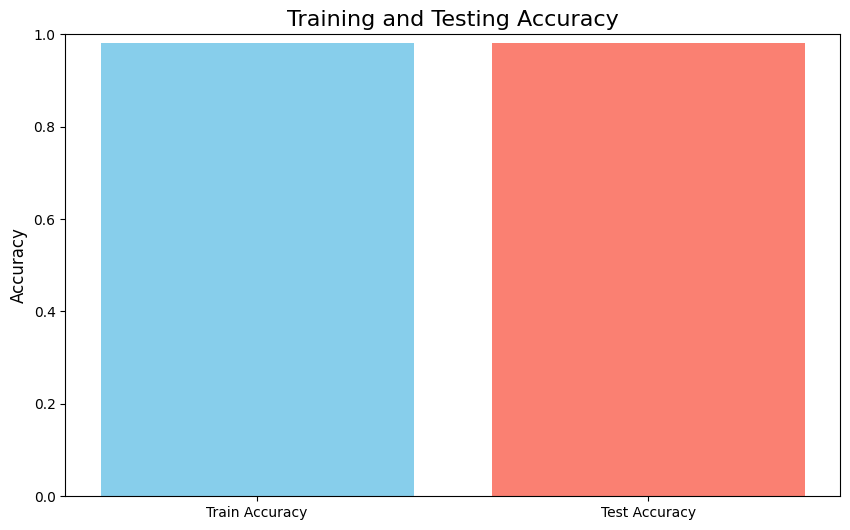

In [104]:
import matplotlib.pyplot as plt
# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=["skyblue", "salmon"])
plt.title("Training and Testing Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.show()

In [105]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6033  164]
 [  28 4306]]


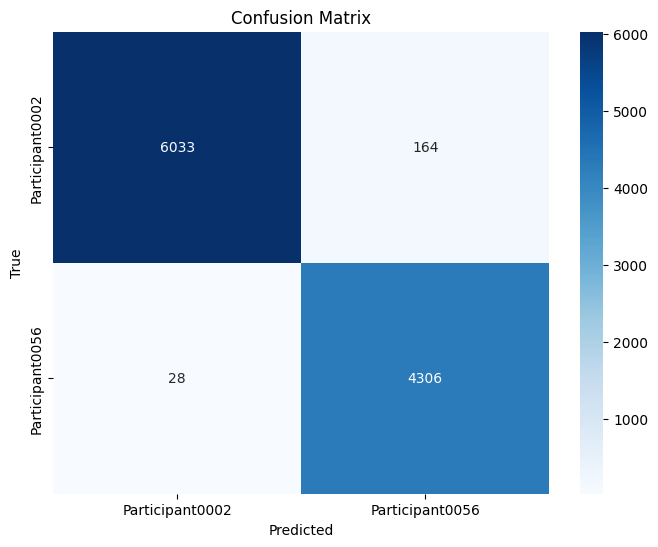

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

/tmp/ipykernel_28017/1758292960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


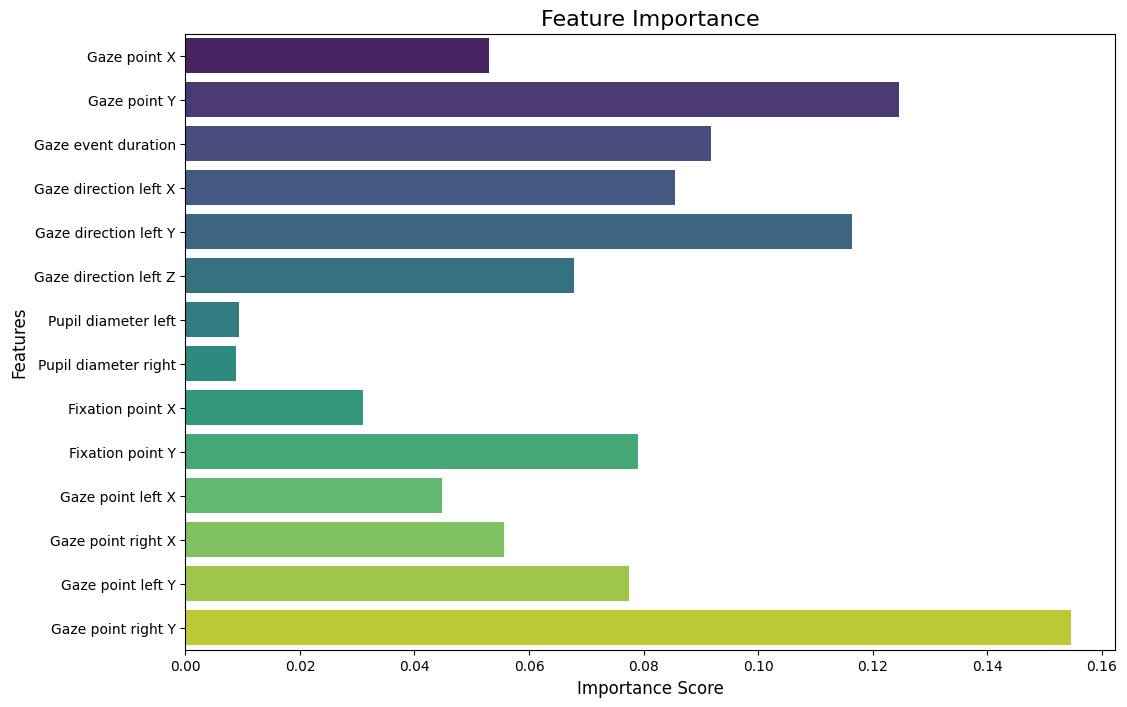

In [107]:
# Feature Importance
feature_importance = classifier.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

## Comparision of different models

In [108]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [109]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [110]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    #Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "AUC-ROC": auc
    }


Training Random Forest...
Training Logistic Regression...
Training K-Nearest Neighbors...
Training Decision Tree...
Training Gradient Boosting...


In [111]:
#dataframe for result comparision
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)

                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Random Forest        0.981768   0.982182  0.981768  0.981808  0.997753
Decision Tree        0.981768   0.982182  0.981768  0.981808  0.997847
K-Nearest Neighbors  0.960403   0.961160  0.960403  0.960511  0.984743
Gradient Boosting    0.946444   0.946622  0.946444  0.946499  0.987357
Logistic Regression  0.827747   0.827247  0.827747  0.827411  0.893630


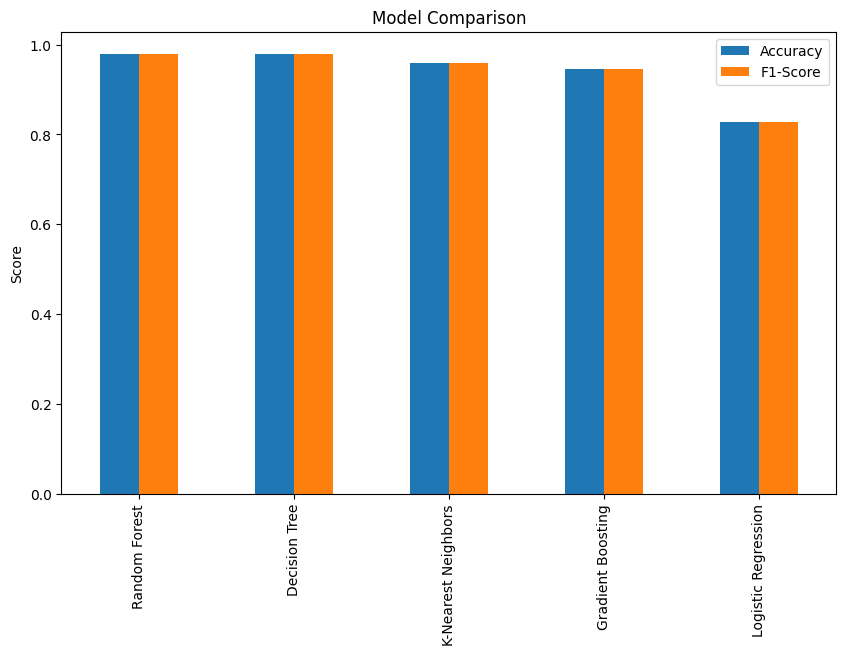

In [105]:
results_df[["Accuracy", "F1-Score"]].plot(kind="bar", figsize=(10, 6), title="Model Comparison")
plt.ylabel("Score")
plt.show()

In [ ]:
!pip install seaborn